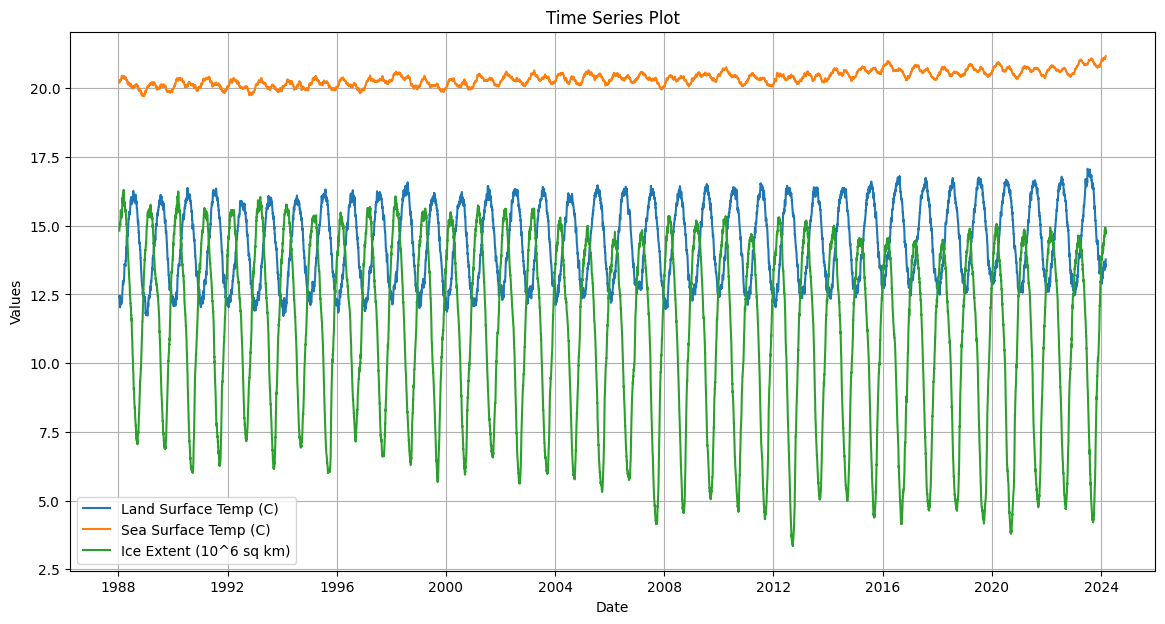

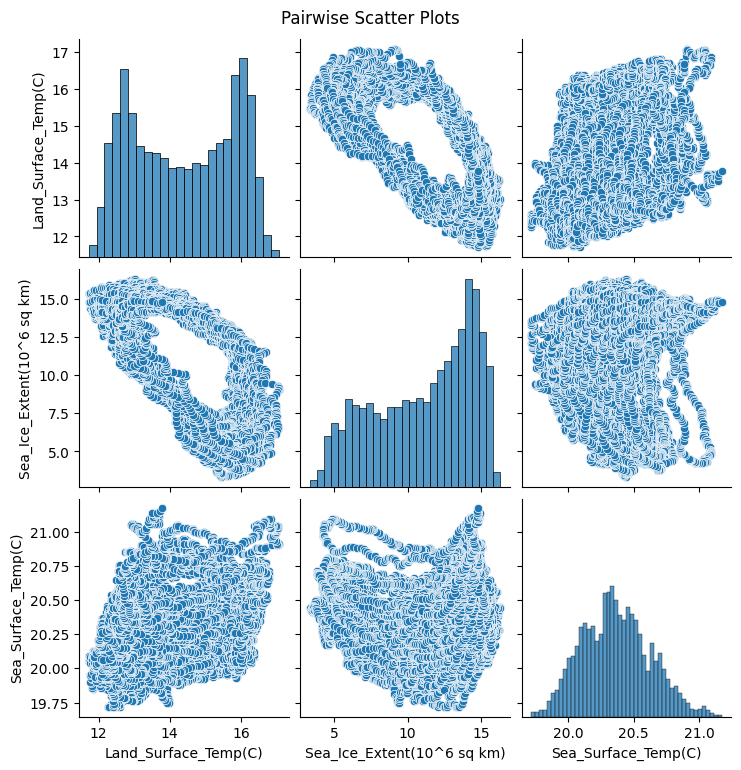

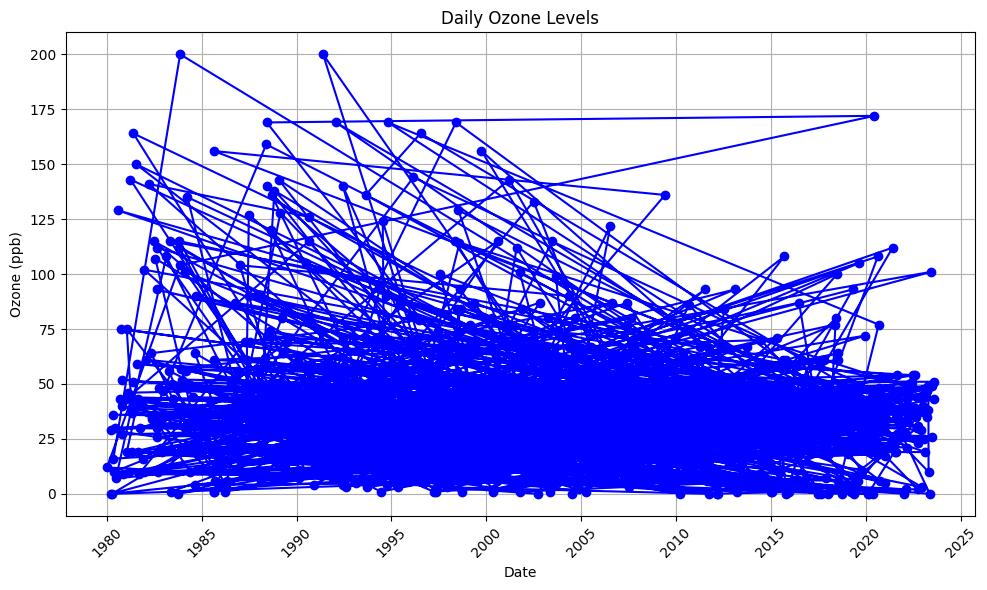

FileNotFoundError: [Errno 2] No such file or directory: '/heatmaps/heatmap_1980-01.html'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib as mpl
import os 

path_climate = os.path.join(os.getcwd(), "data", "climate_change_data", "combined_climate_change_data.csv")
path_aqi = os.path.join(os.getcwd(), "data", "AQI_combined.csv")
df_climate = pd.read_csv(path_climate, parse_dates=["Date"])
df_AQI = pd.read_csv(path_aqi, parse_dates=["Date Local"])

df_climate["Land_Surface_Temp(C)"] = pd.to_numeric(df_climate["Land_Surface_Temp(C)"])
df_climate["Sea_Ice_Extent(10^6 sq km)"] = pd.to_numeric(df_climate["Sea_Ice_Extent(10^6 sq km)"])
df_climate["Sea_Surface_Temp(C)"] = pd.to_numeric(df_climate["Sea_Surface_Temp(C)"])

plt.figure(figsize=(14, 7))
plt.plot(df_climate["Date"], df_climate["Land_Surface_Temp(C)"], label="Land Surface Temp (C)")
plt.plot(df_climate["Date"], df_climate["Sea_Surface_Temp(C)"], label="Sea Surface Temp (C)")
plt.plot(df_climate["Date"], df_climate["Sea_Ice_Extent(10^6 sq km)"], label="Ice Extent (10^6 sq km)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Plot")
plt.legend()
plt.grid(True)
plt.show()

sns.pairplot(df_climate.drop("Date", axis=1))
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

df_AQI['Date Local'] = pd.to_datetime(df_AQI['Date Local'])

sampled_df_AQI = df_AQI.sample(n=1000, random_state=1)

plt.figure(figsize=(10, 6))
plt.plot(sampled_df_AQI['Date Local'], sampled_df_AQI['Ozone'], marker='o', linestyle='-', color='blue')
plt.title('Daily Ozone Levels')
plt.xlabel('Date')
plt.ylabel('Ozone (ppb)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# longitudes = sampled_df_AQI['Longitude']
# norm = mpl.colors.Normalize(vmin=longitudes.min(), vmax=longitudes.max())
# cmap = plt.cm.viridis  # Choosing a colormap

# # Plotting each line segment with a color corresponding to its longitude
# for i in range(len(sampled_df_AQI)-1):  # Assuming sampled_df_AQI is your DataFrame
#     plt.plot(sampled_df_AQI['Date Local'][i:i+2], sampled_df_AQI['Ozone'][i:i+2], linestyle='-', color=cmap(norm(longitudes[i])))

# # Creating a ScalarMappable object for the colorbar
# sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # You have to set the array for the ScalarMappable but it's not used

# # Adding the colorbar to the plot
# plt.colorbar(sm, label='Longitude')

# plt.xlabel('Date')
# plt.ylabel('Ozone (ppb)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(12, 8))
# sns.swarmplot(x='Date Local', y='Ozone', data=sampled_df_AQI)
# plt.title('Swarmplot of Ozone Levels')
# plt.xlabel('Date')
# plt.ylabel('Ozone (ppb)')
# plt.xticks(rotation=45)
# plt.show()





In [3]:

monthly_df_AQI = df_AQI.copy()
monthly_df_AQI['YearMonth'] = monthly_df_AQI['Date Local'].dt.to_period('M')
for (year_month), group in monthly_df_AQI.groupby('YearMonth'):
    # Create a new map object for each month
    m = folium.Map(location=[monthly_df_AQI['Latitude'].mean(), monthly_df_AQI['Longitude'].mean()], zoom_start=5)
    
    # Generate heatmap data
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in group.iterrows()]
    
    # Add the heatmap to the map
    HeatMap(heat_data).add_to(m)
    
    # Save each map as an HTML file
    m.save(f"./heatmaps/heatmap_{year_month}.html")